Implementing Linear Regression with the following steps

- Setting up and visualizing data
- Univsariate Linear Regression (Using Numpy)
- Use scikit learn to implement multivariate regression

Predicting interest rates based on a person's FICO (credit score) and loan amounts

Data obtained from following sources

- https://www.lendingclub.com

- https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv


In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns  
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
loans_data = pd.read_csv("https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv")
loans_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [7]:
loans_data['Loan.Length'][0:10] #loan length

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
62403    36 months
48808    36 months
22090    60 months
76404    36 months
15867    36 months
Name: Loan.Length, dtype: object

In [9]:
loans_data['Interest.Rate'][0:10] #Interest rate

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
62403    15.31%
48808     7.90%
22090    17.14%
76404    14.33%
15867     6.91%
Name: Interest.Rate, dtype: object

In [11]:
loans_data['FICO.Range'][0:10] #FICO Range

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
62403    670-674
48808    720-724
22090    705-709
76404    685-689
15867    715-719
Name: FICO.Range, dtype: object

# Data Cleaning

Changes required to obtain relevant numbers from this data:

- 'months' needs to be removed from Loan.Length
- '%' sign needs to be removed from Interest.Rate
- FICO.Range should be converted to string and then parse that string to a    number. 

'loan.csv' is a csv file containing the cleaned data obtained from local machine.

In [12]:
loans = pd.read_csv('C:\\Users\\Ritesh Mohan Monga\\Documents\\loan.csv')
loans.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


# Data Visualization

- Histogram

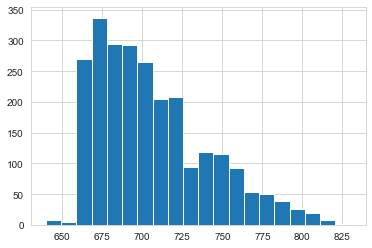

In [13]:
plt.figure()

fico = loans['FICO.Score']
fico.hist(bins = 20)

It's different than normal distribution. There are some other factors determining the FICO score.

- Boxplot (FICO Score vs Interest Rate)

Text(0, 0.5, 'Interest Rate in %')

<Figure size 432x288 with 0 Axes>

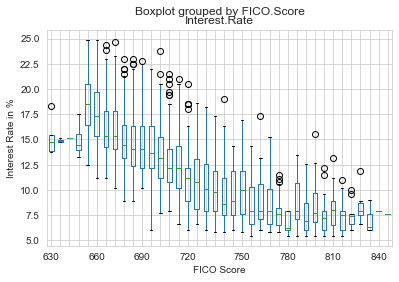

In [19]:
plt.figure()

x = loans.boxplot('Interest.Rate', 'FICO.Score')


x.set_xticklabels(['630', '', '', '', '', '660', '', '', '', ' ', '690',
                   '', '', '', ' ', '720', '', '', '', '', '', '750',  '',
                   '', ' ', '', '780', '', '', '', ' ', '810' '', '', '',
                    ' ', ' ', '840'])
              

x.set_xlabel('FICO Score')
x.set_ylabel('Interest Rate in %')


trend - interest rate goes down towards high fico scores 
at FICO 800, interest range is 7 to 12 % => some other factors determining interest ratew given same fico


 - Scatterplot Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002558C52DC50>,
      dtype=object)

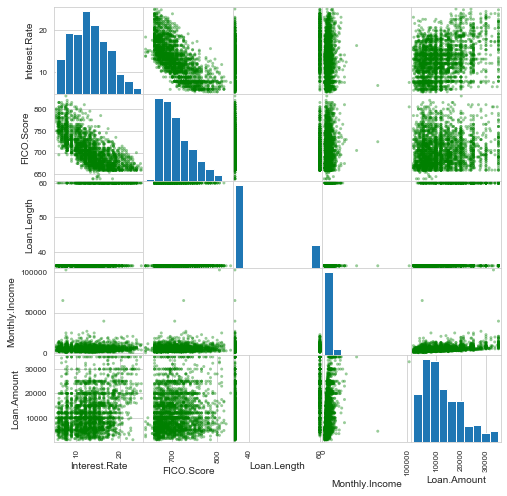

In [30]:
from pandas.plotting import scatter_matrix
 
scatter_matrix(loans, alpha = 0.4, color = 'green', figsize = (8,8), diagonal = 'hist')

The above figure indicates that Interest Rate varies linearly with FICO.Score and somewhat linearly with Loan Amount. We can use FICO.Score and Loan Amount for our regression model as they are independent variables.

The scatterplot matrix also shows that the relationship of Interest Rate with Loan Length and Monthly Income is not linear. 

# Analysis

- Multivariate Linear Regression

In [33]:
import statsmodels.api as sm

In [34]:
dframe = loans

In [35]:
int_rate = dframe['Interest.Rate']
loan_amt = dframe['Loan.Amount']
fico_score = dframe['FICO.Score']

In [36]:
y = np.matrix(int_rate).transpose() #dependent variable

In [39]:
# independent variables
x1 = np.matrix(fico_score).transpose()
x2 = np.matrix(loan_amt).transpose()

In [40]:
x = np.column_stack([x1, x2]) # stacking x1 and x2 as columns in a matrix

In [42]:
x3 = sm.add_constant(x) #adds a column to input dataset

In [43]:
# implementing Ordinary Least Squares(OLS) method to create a model
model = sm.OLS(y, x3)

In [44]:
model_fit = model.fit()

In [47]:
# using statsmodels.api we can generate p-values and r-squared values for our model

print ("The P values are: ", model_fit.pvalues) # should be in between 0 and 0.05

print ("The R-squared value is: ", model_fit.rsquared) # between -1 and 1

The P values are:  [0.00000000e+000 0.00000000e+000 5.96972978e-203]
The R-squared value is:  0.6566326246493588


These values describe the Multivariate Linear Regression Model for Interest Rate bsed on FICO score and Loan Amount. Three p-values are obtained with two of them being zero and the third value also very close to zero. The r-squared value, at 0.66, is in the desired range. We can say that Interest Rate is influenced by Loan Amount and FICO Score.